In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
#from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\milon\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='C:/Users/milon/Desktop/nlp6/' 
stopwords_list = path+'bangla_stopwords.txt'


In [3]:
data = pd.read_csv(path+'comment_15000.csv')
pd.set_option('display.max_colwidth', 100)
data.head()

,Comment,Tag
0,আমি অপমানিত বোধ করি।,sadness
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness
4,আমি অস্থির বোধ করছি,anger


# Text Preprocessing 

### punctuation & URL  remove

In [4]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
#from emoji import demojize

def remove_punctuation(txt):
    #clean_tex = [c for c in txt if c not in string.punctuation]
    clean_tex = re.sub('[^\u0980-\u09FF]',' ',str(txt))
    clean_tex = re.sub(r"https?://\S+", "", str(txt))
    
    clean_text = re.sub(r"<a[^>]*>(.*?)</a>", r"\1", txt)
    clean_text = re.sub(r"<.*?>", " ", txt)
    clean_text = " ".join(txt.split())
    clean_text = " ".join([w for w in txt.split() if not w.isdigit()])
    clean_text = " ".join([w for w in txt.split() if w.isalpha()])
    #clean_text = demojize(txt)
    clean_tex = re.sub(r"\s+", " ", txt)
    return clean_tex
# https://dylancastillo.co/nlp-snippets-clean-and-tokenize-text-with-python/#lowercase-text

In [6]:
def remove_punctuation(txt):
#     txt_nopunct = [c for c in txt if c not in string.punctuation]
    txt_nopunct = re.sub('[^\u0980-\u09FF]',' ',str(txt))
    return txt_nopunct


In [7]:
data['msg_clean'] = data['Comment'].apply(lambda x: remove_punctuation(x))
data.head()

,Comment,Tag,msg_clean
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি


### Tokenization

In [8]:
from bnlp import NLTKTokenizer

bnltk = NLTKTokenizer()

# text = "আমি ভাত খাই। সে বাজারে যায়। তিনি কি সত্যিই ভালো মানুষ?"

# word_tokens = bnltk.word_tokenize(text)
# sentence_tokens = bnltk.sentence_tokenize(text)
# print(word_tokens)
# print(sentence_tokens)

data['msg_clean_word_tokenize'] = data['msg_clean'].apply(lambda x: bnltk.word_tokenize(x.lower()))
data.head()


C:\Users\milon\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


,Comment,Tag,msg_clean,msg_clean_word_tokenize
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশাবাদী, হতে, পারি, শুধুমাত্র, যত্নশীল, এবং, জাগ্রত, ..."
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আমি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, আমি, জানব, যে, এটি, এখনও, সম্পত্তিতে, রয..."
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]"


In [9]:
# data['msg_clean_sen_tokenize'] = data['msg_clean'].apply(lambda x: bnltk.sentence_tokenize(x.lower()))
# data.head()

In [10]:
# import nltk
# from nltk.corpus import stopwords
# print(stopwords.words('bengali'))

###  remove stop words এবং, খুব, থেকেএসব বাদ যাবে

In [11]:
stopwords = nltk.corpus.stopwords.words('bengali')
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean
data['msg_no_sw'] = data['msg_clean_word_tokenize'].apply(lambda x: remove_stopwords(x)) # msg_no_sw = msg no stop word

In [12]:
data.head()

,Comment,Tag,msg_clean,msg_clean_word_tokenize,msg_no_sw
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশাবাদী, হতে, পারি, শুধুমাত্র, যত্নশীল, এবং, জাগ্রত, ...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]"
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আমি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, আমি, জানব, যে, এটি, এখনও, সম্পত্তিতে, রয...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]"
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]"


### Steemmer  (availabel = avail)


In [13]:
#import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

data['msg_stemmed'] = data['msg_no_sw'].apply(lambda x: stemming(x))

In [14]:
data.head(10)

,Comment,Tag,msg_clean,msg_clean_word_tokenize,msg_no_sw,msg_stemmed
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশাবাদী, হতে, পারি, শুধুমাত্র, যত্নশীল, এবং, জাগ্রত, ...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]"
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আমি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, আমি, জানব, যে, এটি, এখনও, সম্পত্তিতে, রয...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]"
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]"
5,আমি ইদানীং কিছুটা বোঝা বোধ করছি কেন তা ছিল তা নিশ্চিত নই।,sadness,আমি ইদানীং কিছুটা বোঝা বোধ করছি কেন তা ছিল তা নিশ্চিত নই,"[আমি, ইদানীং, কিছুটা, বোঝা, বোধ, করছি, কেন, তা, ছিল, তা, নিশ্চিত, নই]","[ইদানীং, কিছুটা, বোঝা, বোধ, করছি, নিশ্চিত, নই]","[ইদানীং, কিছুটা, বোঝা, বোধ, করছি, নিশ্চিত, নই]"
6,আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত বোধ করি বা একজন বছরের বৃদ্ধের মতো হতাশ।,fear,আমি একজন কিশোর হিসাবে জীবন সম্পর্কে বিভ্রান্ত বোধ করি বা একজন বছরের বৃদ্ধের মতো হতাশ,"[আমি, একজন, কিশোর, হিসাবে, জীবন, সম্পর্কে, বিভ্রান্ত, বোধ, করি, বা, একজন, বছরের, বৃদ্ধের, মতো, হ...","[একজন, কিশোর, জীবন, সম্পর্কে, বিভ্রান্ত, বোধ, একজন, বছরের, বৃদ্ধের, হতাশ]","[একজন, কিশোর, জীবন, সম্পর্কে, বিভ্রান্ত, বোধ, একজন, বছরের, বৃদ্ধের, হতাশ]"
7,আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি মনে করি পেট্রোনাস ভাল পারফর্ম করেছে এবং প্রচুর লাভ...,happy,আমি বছরের পর বছর ধরে পেট্রোনাসের সাথে আছি আমি মনে করি পেট্রোনাস ভাল পারফর্ম করেছে এবং প্রচুর লাভ...,"[আমি, বছরের, পর, বছর, ধরে, পেট্রোনাসের, সাথে, আছি, আমি, মনে, করি, পেট্রোনাস, ভাল, পারফর্ম, করেছে...","[বছরের, বছর, পেট্রোনাসের, সাথে, আছি, পেট্রোনাস, ভাল, পারফর্ম, প্রচুর, লাভ]","[বছরের, বছর, পেট্রোনাসের, সাথে, আছি, পেট্রোনাস, ভাল, পারফর্ম, প্রচুর, লাভ]"
8,আমিও রোমান্টিক বোধ করি।,love,আমিও রোমান্টিক বোধ করি,"[আমিও, রোমান্টিক, বোধ, করি]","[আমিও, রোমান্টিক, বোধ]","[আমিও, রোমান্টিক, বোধ]"
9,"আমি মনে করি যে, আমি কিছু একটা দেখছি সেই কষ্টটা আমাকে করতে হবে।",sadness,আমি মনে করি যে আমি কিছু একটা দেখছি সেই কষ্টটা আমাকে করতে হবে,"[আমি, মনে, করি, যে, আমি, কিছু, একটা, দেখছি, সেই, কষ্টটা, আমাকে, করতে, হবে]","[একটা, দেখছি, কষ্টটা]","[একটা, দেখছি, কষ্টটা]"


In [15]:
# #import nltk
# from bangla_stemmer.stemmer import stemmer
# stmr = stemmer.BanglaStemmer()

# def stemming(tokenized_text):
#     text = [stmr.stem(word) for word in tokenized_text]
#     return text

# data['msg_stemmed'] = data['msg_no_sw'].apply(lambda x: stemming(x))


In [16]:
# from bangla_stemmer.stemmer import stemmer
# wordlist = ['কবিরগুলিকে', 'আমাকে', 'নামাবার']
# stmr = stemmer.BanglaStemmer()
# stm = stmr.stem(wordlist)
# print(stm)

### Lemmatization


In [17]:
import nltk
wn = nltk.WordNetLemmatizer()  # wn= WordNet lemmatize এর জন্য ব্যবহার করা হয়েছে। 
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [18]:
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [19]:
data['msg_lemmatized' ] = data['msg_stemmed'].apply(lambda x : lemmatization(x))

data.head(3)  

# in 4th line  goes -> go and lives -> live

,Comment,Tag,msg_clean,msg_clean_word_tokenize,msg_no_sw,msg_stemmed,msg_lemmatized
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]","[অপমানিত, বোধ]"
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশাবাদী, হতে, পারি, শুধুমাত্র, যত্নশীল, এবং, জাগ্রত, ...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]"
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আমি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]"


In [20]:
data['clean'] = data['msg_lemmatized'].apply(lambda x: ' '.join(x))
data.head()

,Comment,Tag,msg_clean,msg_clean_word_tokenize,msg_no_sw,msg_stemmed,msg_lemmatized,clean
0,আমি অপমানিত বোধ করি।,sadness,আমি অপমানিত বোধ করি,"[আমি, অপমানিত, বোধ, করি]","[অপমানিত, বোধ]","[অপমানিত, বোধ]","[অপমানিত, বোধ]",অপমানিত বোধ
1,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,sadness,আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...,"[আমি, খুব, নিরাশ, বোধ, থেকে, খুব, অভিশপ্ত, আশাবাদী, হতে, পারি, শুধুমাত্র, যত্নশীল, এবং, জাগ্রত, ...","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]","[নিরাশ, বোধ, অভিশপ্ত, আশাবাদী, শুধুমাত্র, যত্নশীল, জাগ্রত, একজনের, আশেপাশে]",নিরাশ বোধ অভিশপ্ত আশাবাদী শুধুমাত্র যত্নশীল জাগ্রত একজনের আশেপাশে
2,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি।,anger,আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি,"[আমি, পোস্ট, করার, জন্য, একটি, মিনিট, ধরছি, আমি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]","[পোস্ট, মিনিট, ধরছি, লোভী, ভুল, বোধ, করছি]",পোস্ট মিনিট ধরছি লোভী ভুল বোধ করছি
3,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,sadness,আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে,"[আমি, কখনও, অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, আমি, জানব, যে, এটি, এখনও, সম্পত্তিতে, রয...","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]","[অগ্নিকুণ্ড, সম্পর্কে, নস্টালজিক, বোধ, করছি, জানব, সম্পত্তিতে]",অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি জানব সম্পত্তিতে
4,আমি অস্থির বোধ করছি,anger,আমি অস্থির বোধ করছি,"[আমি, অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]","[অস্থির, বোধ, করছি]",অস্থির বোধ করছি


## Level Encoder

In [21]:
# label

le = LabelEncoder()
le.fit(data.Tag)
encoded_labels = le.transform(data.Tag)

labels = np.array(encoded_labels)
class_names = le.classes_

print(labels[:10])

[4 4 0 4 0 4 1 2 3 4]


In [22]:
# # Import label encoder 
# from sklearn import preprocessing
# # label_encoder object knows how to understand word labels. 
# label_encoder = preprocessing.LabelEncoder()
# # Encode labels in column 'Country'. 
# data[]= label_encoder.fit_transform(data['Comment']) 
# print(data.head())
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
data['Comment']= label_encoder.fit_transform(data['Comment']) 
print(data.head())

   Comment      Tag  \
0     2102  sadness   
1     7322  sadness   
2     9703    anger   
3     6484  sadness   
4     2302    anger   

                                                                                             msg_clean  \
0                                                                                 আমি অপমানিত বোধ করি    
1  আমি খুব নিরাশ বোধ থেকে খুব অভিশপ্ত আশাবাদী হতে পারি শুধুমাত্র যত্নশীল এবং জাগ্রত একজনের আশেপাশে ...   
2                                           আমি পোস্ট করার জন্য একটি মিনিট ধরছি আমি লোভী ভুল বোধ করছি    
3               আমি কখনও অগ্নিকুণ্ড সম্পর্কে নস্টালজিক বোধ করছি আমি জানব যে এটি এখনও সম্পত্তিতে রয়েছে   
4                                                                                  আমি অস্থির বোধ করছি   

                                                                               msg_clean_word_tokenize  \
0                                                                             [আমি, অপমানিত, বোধ, করি]   
1  [আমি, খুব

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15538 entries, 0 to 15537
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Comment                  15538 non-null  int32 
 1   Tag                      15538 non-null  object
 2   msg_clean                15538 non-null  object
 3   msg_clean_word_tokenize  15538 non-null  object
 4   msg_no_sw                15538 non-null  object
 5   msg_stemmed              15538 non-null  object
 6   msg_lemmatized           15538 non-null  object
 7   clean                    15538 non-null  object
dtypes: int32(1), object(7)
memory usage: 910.6+ KB


#  Features Extraction

In [24]:
# from sklearn.feature_extraction.text import CountVectorizer
# x = np.array(data.iloc[:,0].values)
# #y = np.array(dataset.CatagoriId.values)
# y = np.array(labels)
# cv = CountVectorizer(max_features = 5000000000, ngram_range=(1,2), tokenizer=lambda x: x.split()) #ngram_range=(1,3), tokenizer=lambda x: x.split()
# #cv = CountVectorizer(stop_words=stopwords_list)
# #x1 = cv.fit_transform(dataset.cleaned).toarray()
# x1 = cv.fit_transform(data.clean).toarray()
# print("X.shape = ",x1.shape)
# print("y.shape = ",y.shape)
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
x = np.array(data.iloc[:0].values)
#y = np.array(dataset.CatagoriId.values)
y = np.array(labels)
cv = CountVectorizer(max_features = 5000000000, ngram_range=(1,2), tokenizer=lambda x: x.split()) #ngram_range=(1,3), tokenizer=lambda x: x.split()
#cv = CountVectorizer(stop_words=stopwords_list)
#x1 = cv.fit_transform(dataset.cleaned).toarray()
x1 = cv.fit_transform(data.clean).toarray()
print("X.shape = ",x1.shape)
print("y.shape = ",y.shape)

X.shape =  (15538, 100918)
y.shape =  (15538,)


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
  

# Create a Vectorizer Object
vectorizer = CountVectorizer()
  
vectorizer.fit(data.clean)
  
# Printing the identified Unique words along with their indices
print("Vocabulary: ", vectorizer.vocabulary_)
  
# Encode the Document
vector = vectorizer.transform(document)
  
# Summarizing the Encoded Texts
print("Encoded Document is:")
print(vector.toarray(10))

Vocabulary:  {'অপম': 39, 'অভ': 66, 'শপ': 1933, 'আশ': 222, 'যত': 1674, 'নশ': 1338, 'রত': 1758, 'একজন': 481, 'ধরছ': 1268, 'করছ': 697, 'অগ': 4, 'সম': 2054, 'পর': 1409, 'নস': 1342, 'লজ': 1871, 'নব': 1317, 'পত': 1381, 'অস': 87, 'ইদ': 290, 'নই': 1277, 'বন': 1497, 'বছর': 1476, 'হত': 2120, 'আছ': 150, 'রফর': 1783, 'রচ': 1736, 'আম': 195, 'একট': 484, 'খছ': 740, 'কষ': 722, 'টট': 994, 'অন': 25, 'ভব': 1561, 'ঐশ': 591, 'বর': 1513, 'ঞত': 973, 'ধরণ': 1269, 'আধ': 165, 'অসন': 90, 'সবচ': 2045, 'সহজ': 2086, 'সময': 2062, 'সময়': 2066, 'কম': 685, 'শক': 1911, 'ষয': 1989, 'অপর': 40, 'সহ': 2082, 'খক': 735, 'এজ': 508, 'রক': 1719, 'শন': 1929, 'যব': 1689, 'বস': 1539, 'উদ': 391, 'সত': 2022, 'রভ': 1796, 'কর': 696, 'টব': 1008, 'লগ': 1857, 'দনশ': 1215, 'দশক': 1239, 'নট': 1298, 'রব': 1785, 'রহ': 1834, 'আপ': 175, 'ষহ': 1997, 'ইউন': 247, 'সন': 2029, 'ণভ': 1092, 'শল': 1945, 'উন': 394, 'দয': 1226, 'ঈশ': 358, 'আক': 134, 'চট': 865, 'তজ': 1110, 'আনন': 171, 'সমর': 2063, 'থন': 1178, 'উত': 389, 'ইফল': 315, 'ইনক': 295, 'ইত': 285, 

NameError: name 'document' is not defined

In [ ]:
# from sklearn.feature_extraction.text import TfidfTransformer
# tfidf_transformer = TfidfTransformer()
# X = tfidf_transformer.fit_transform(x1)
# X.shape

from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(x1)
X.shape

# Model Train

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state =25,shuffle = True ) #shuffle = True
#print(len(X_train))
#print(len(X_test))


In [ ]:
# Import multinomialNB
from sklearn.naive_bayes import MultinomialNB
# create MultinomialNB object
clf= MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
# Train clf
clf.fit(X_train, y_train)
# Compute accuracy on test set
accuracy= clf.score(X_test, y_test)
# compute accuracy on train set
accuracy_train = clf.score(X_train, y_train)

accuracy = round(accuracy * 100,2)
accuracy_train = round(accuracy_train*100,2)
print("The accuracy of the classifier is %.3f" %  accuracy)

print("The accuracy_train of the classifier is %.3f" %  accuracy_train)

In [29]:
# plt.figure(figsize = (20,20))
# wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(str(" ".join(X_train)))
# plt.imshow(wc,interpolation = 'bilinear')

# Test of comment

In [30]:

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' , random_state=0).fit(X_train, y_train)
classifier
y_pred = classifier.predict(X_test)


data_input = input("Give your emotion : ")

y_pred1 = cv.transform([data_input])

#y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])
#y_pred1 = cv.transform(['আমি অপমানিত, বোধ করি'])
#y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])

yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "anger"
elif yy == [1]:
  result = "fear"
elif yy == [2]:
  result = "happy"
elif yy == [3]:
  result = "love"
elif yy == [4]:
  result = "sadness"
print(result)

Give your emotion : আমি কষ্টে আছি
sadness


 Category : 
 0 = anger,
1 = fear,
2 = happy,
3 = love,
4 = sadness

In [ ]:
# data_input = input("Give your emotion : ")

# y_pred1 = cv.transform([data_input])

# #y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])
# #y_pred1 = cv.transform(['আমি অপমানিত, বোধ করি'])

# #y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])

# yy = classifier.predict(y_pred1)
# result = ""
# if yy == [0]:
#   result = "anger"
# elif yy == [1]:
#   result = "fear"
# elif yy == [2]:
#   result = "happy"
# elif yy == [3]:
#   result = "love"
# elif yy == [4]:
#   result = "sadness"
# print(result)

In [ ]:
# data_input = input("Give your emotion : ")

# y_pred1 = cv.transform([data_input])

# #y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])
# #y_pred1 = cv.transform(['আমি অপমানিত, বোধ করি'])

# #y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])

# yy = classifier.predict(y_pred1)
# result = ""
# if yy == [0]:
#   result = "anger"
# elif yy == [1]:
#   result = "fear"
# elif yy == [2]:
#   result = "happy"
# elif yy == [3]:
#   result = "love"
# elif yy == [4]:
#   result = "sadness"
# print(result)


In [31]:
data_input = input("Give your emotion : ")

y_pred1 = cv.transform([data_input])

#y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])
#y_pred1 = cv.transform(['আমি অপমানিত, বোধ করি'])

#y_pred1 = tfidf.transform(['আমি অপমানিত, বোধ করি'])

yy = classifier.predict(y_pred1)
result = ""
if yy == [0]:
  result = "anger"
elif yy == [1]:
  result = "fear"
elif yy == [2]:
  result = "happy"
elif yy == [3]:
  result = "love"
elif yy == [4]:
  result = "sadness"
print(result)

Give your emotion : িআমি সুখে আছি
sadness


C:\Users\milon\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


confussion matrix
[[ 93   4  69   1  46]
 [  7 108  44   0  48]
 [  2   9 477   6  25]
 [  0   0  85  28  23]
 [ 12   7  58   0 402]]


Accuracy of Logistic Regression: 71.2998712998713 

              precision    recall  f1-score   support

           0       0.82      0.44      0.57       213
           1       0.84      0.52      0.64       207
           2       0.65      0.92      0.76       519
           3       0.80      0.21      0.33       136
           4       0.74      0.84      0.79       479

    accuracy                           0.71      1554
   macro avg       0.77      0.58      0.62      1554
weighted avg       0.74      0.71      0.69      1554

confussion matrix
[[128   6  45   3  31]
 [  6 138  35   0  28]
 [  4   9 477   5  24]
 [  3   1  67  54  11]
 [ 18  13  68   3 377]]


Accuracy of Random Forest: 75.54697554697555 

              precision    recall  f1-score   support

           0       0.81      0.60      0.69       213
           1       0.83      0.

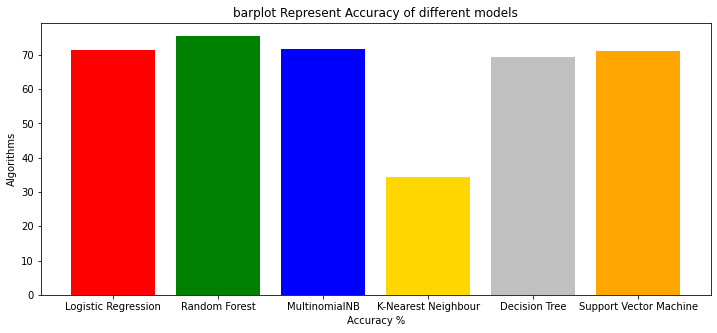

In [32]:
m1 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))


m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=100, random_state=10,max_depth=1000)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))


m4 = 'MultinomialNB'
mnb = MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)
mnb.fit(X_train, y_train)
mnb_predicted = mnb.predict(X_test)
mnb_conf_matrix = confusion_matrix(y_test, mnb_predicted)
mnb_acc_score = accuracy_score(y_test, mnb_predicted)
print("confussion matrix")
print(mnb_conf_matrix)
print("\n")
print("Accuracy of MultinomialNB:",mnb_acc_score*100,'\n')
print(classification_report(y_test,mnb_predicted))


m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=110,max_depth = 100000)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

# Accuracy Metrics
"""
#lr_false_positive_rate,lr_true_positive_rate,lr_threshold = roc_curve(y_test,lr_predict)
#nb_false_positive_rate,nb_true_positive_rate,nb_threshold = roc_curve(y_test,nbpred)
rf_false_positive_rate,rf_true_positive_rate,rf_threshold = roc_curve(y_test,rf_predicted)                                                             
mnb_false_positive_rate,mnb_true_positive_rate,mnb_threshold = roc_curve(y_test,mnb_predicted)
knn_false_positive_rate,knn_true_positive_rate,knn_threshold = roc_curve(y_test,knn_predicted)
dt_false_positive_rate,dt_true_positive_rate,dt_threshold = roc_curve(y_test,dt_predicted)
svc_false_positive_rate,svc_true_positive_rate,svc_threshold = roc_curve(y_test,svc_predicted)
"""
"""
sns.set_style('whitegrid')
plt.figure(figsize=(10,5))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(lr_false_positive_rate,lr_true_positive_rate,label='Logistic Regression')
#plt.plot(nb_false_positive_rate,nb_true_positive_rate,label='Naive Bayes')
plt.plot(rf_false_positive_rate,rf_true_positive_rate,label='Random Forest')
plt.plot(mnb_false_positive_rate,mnb_true_positive_rate,label='MultinomialNB')
plt.plot(knn_false_positive_rate,knn_true_positive_rate,label='K-Nearest Neighbor')
plt.plot(dt_false_positive_rate,dt_true_positive_rate,label='Desion Tree')
plt.plot(svc_false_positive_rate,svc_true_positive_rate,label='Support Vector Classifier')

plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()
"""
# Model Evaluation
"""
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Naive Bayes','Random Forest','Extreme Gradient Boost',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    nb_acc_score*100,rf_acc_score*100,xgb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

"""
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MultinomialNB',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,mnb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
model_ev

colors = ['red','green','blue','gold','silver','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

In [33]:
#create list of model and accuracy dicts
perform_list = [ ]

model_performance = pd.DataFrame({'Model': ['Logistic Regression','Random Forest','MultinomialNB',
                    'K-Nearest Neighbour','Decision Tree','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,rf_acc_score*100,mnb_acc_score*100,knn_acc_score*100,dt_acc_score*100,svc_acc_score*100]})
#model_performance = model_ev[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Accuracy
0,Logistic Regression,71.299871
1,Random Forest,75.546976
2,MultinomialNB,71.879022
3,K-Nearest Neighbour,34.427284
4,Decision Tree,69.498069
5,Support Vector Machine,71.171171


# comparitive analysis

In [34]:
model = model_performance["Model"]
max_value = model_performance["Accuracy"].max()
print("The best accuracy of model is", max_value,"from RF")

The best accuracy of model is 75.54697554697555 from RF
